## State-Dependent Semideterministic Broadcast Channel Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
# PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(solver = "pyomo.gurobi")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)           # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)           # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue")   # Reasons in proofs are blue

In [2]:
X, Y, Z, S, U = rv("X, Y, Z, S, U")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

# Define state-dependent semideterministic BC [Lapidoth-Wang 2012]
model = CodingModel()
model.set_rate(M1, R1)              # Rate of M1 is R1
model.set_rate(M2, R2)              # Rate of M2 is R2
model.add_node(M1+M2+S, X,
          label = "Enc")            # Encoder maps M1,M2,S to X
model.add_edge(X+S, Y, is_fcn=True) # Y is a function of X,S
model.add_edge(X+S, Z)              # Channel X,S -> Z
model.add_node(Y, M1,
        label = "Dec 1")            # Decoder 1 maps Y to M1
model.add_node(Z, M2,
        label = "Dec 2")            # Decoder 2 maps Z to M2

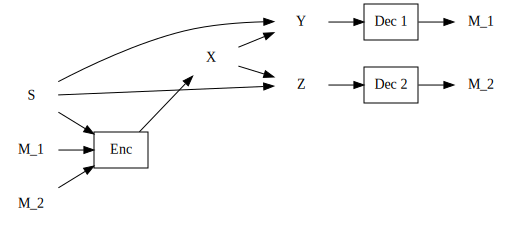

In [3]:
model.graph()             # Draw diagram

In [4]:
# Inner bound via [Lee-Chung 2015], give [Lapidoth-Wang 2012]
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

In [4]:
# Inner bound via [Lee-Chung 2015], give [Lapidoth-Wang 2012]
r = model.get_inner()
r

( ( R1 >= 0 )
 &( R2 >= 0 )
 &( R1 <= H(Y|S) )
 &( R2 <= I(A_M2&Z)-I(A_M2&S) )
 &( R1+R2 <= I(A_M2&Z)+H(Y|A_M2+S)-I(A_M2&S) )
 &( H(Y|S+X) == 0 )
 &( markov(A_M2+Y, S+X, Z) ) ).exists(A_M2)

In [5]:
# Enable case decomposition
with PsiOpts(cases = True):
    
    # Output converse proof (is_proof = True for shorter proof)
    (model.get_outer(is_proof = True) >> r).proof().display()

<IPython.core.display.Math object>

In [2]:
X, Y, Z, S, U, V, W = rv("X, Y, Z, S, U, V, W")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

# Define state-dependent semideterministic BC, causal [Lapidoth-Wang 2012]
model = CodingModel()
model.set_rate(M1, R1)              # Rate of M1 is R1
model.set_rate(M2, R2)              # Rate of M2 is R2
model.add_node(M1+M2+S, X,
          label = "Enc", rv_in_causal=S)            # Encoder maps M1,M2,S to X
model.add_edge(X+S, Y, is_fcn=True) # Y is a function of X,S
model.add_edge(X+S, Z)              # Channel X,S -> Z
model.add_node(Y, M1,
        label = "Dec 1")            # Decoder 1 maps Y to M1
model.add_node(Z, M2,
        label = "Dec 2")            # Decoder 2 maps Z to M2

In [3]:
# Inner bound via [Lee-Chung 2015]
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

In [4]:
rs = r.subs(list(zip(r.aux, [U, V, W])))
rs

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(W+U&Y) )
 &( R_2 <= I(W+V&Z) )
 &( R_1+R_2 <= I(U&Y|W)+I(W+V&Z)-I(U&V|W) )
 &( R_1+R_2 <= I(V&Z|W)+I(W+U&Y)-I(U&V|W) )
 &( H(Y|S+X) == 0 )
 &( indep(W+U+V, S) )
 &( markov(W+U+V+Y, S+X, Z) ) ).exists(U+V+W)

In [5]:
print(rs)

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(W+U&Y) )
 &( R_2 <= I(W+V&Z) )
 &( R_1+R_2 <= I(U&Y|W)+I(W+V&Z)-I(U&V|W) )
 &( R_1+R_2 <= I(V&Z|W)+I(W+U&Y)-I(U&V|W) )
 &( H(Y|S+X) == 0 )
 &( indep(W+U+V, S) )
 &( markov(W+U+V+Y, S+X, Z) ) ).exists(U+V+W)


In [6]:
r2 = rs.simplified(level=9)
r2

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(U+W&Y) )
 &( R_2 <= I(V+W&Z) )
 &( R_1+R_2 <= I(U&Y|W)+I(V+W&Z)-I(U&V|W) )
 &( R_1+R_2 <= I(V&Z|W)+I(U+W&Y)-I(U&V|W) )
 &( H(Y|S+X) == 0 )
 &( indep(S, U+V+W) )
 &( markov(U+V+W+Y, S+X, Z) ) ).exists(U+V+W)

In [7]:
print(r2.tostring(style="std"))

{ R_1 >= 0,
  R_2 >= 0,
  R_1 <= I(U,W;Y),
  R_2 <= I(V,W;Z),
  R_1+R_2 <= I(U;Y|W)+I(V,W;Z)-I(U;V|W),
  R_1+R_2 <= I(V;Z|W)+I(U,W;Y)-I(U;V|W),
  H(Y|S,X) == 0,
  indep(S, (U,V,W)),
  markov((U,V,W,Y), (S,X), Z) } , exists U,V,W


In [9]:
# Enable case decomposition
with PsiOpts(cases = True):
    
    # Output converse proof (is_proof = True for shorter proof)
    (model.get_outer(is_proof = True) >> r).proof().display()

<IPython.core.display.Math object>

In [8]:
r_out = model.get_outer(1, future=False)
r_out

KeyboardInterrupt: 

### References
- A. Lapidoth and L. Wang, "The state-dependent semideterministic broadcast channel," IEEE Trans. Inf. Theory, vol. 59, no. 4, pp. 2242-2251, 2012.
- Y. Steinberg and S. Shamai, "Achievable rates for the broadcast channel with states known at the transmitter," in Proc. IEEE Int. Symp. Inf. Theory, Adelaide, Australia, 2005, pp. 2184-2188.